In [ ]:
# TASK-3
# Customer churn production

In [ ]:

import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        arquivo = os.path.join(dirname, filename)
        print(os.path.join(dirname, filename))

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


In [ ]:
df = pd.read_csv(arquivo)

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#verificando como estão os dados do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
#removendo as colunas que não irei precisar
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#veficando como ficou o dataframr do dataframe
df.shape

(10000, 11)

In [ ]:
#verificando a base de clientes
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Algumas observações sobre a base de clientes.

A média de produtos dos clientes é baixa de apenas 1.53 produtos por cliente, levando em consideração o mix de produtos de uma instituição financeira e o tempo de relacionamento dos clientes com a instituição em que 75% tem relacionamento a mais de 3 anos, podemos considerar que ou a instituição possui um baixo mix de produtos ou realmente os clientes possuem baixa reciprocidade.

Pode-se observar também que a média dos scores e das idades dos clientes é boa, sendo 650 e  38, respectivamente, o que nos leva a inferir que os riscos associados aos clientes dessa instituição é baixo.

Na base temos que 20.37% é o percentual de perda dos clientes, sendo que 51.51% é o percentual de membros ativos e 70.55% dos clientes possuem cartão de crédito.



In [ ]:
#importando os pacotes necessários
import random
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns



# Definir a semente aleatória
random_seed = 42

random.seed(random_seed)
np.random.seed(random_seed)


#separando o target do dataframe
X = df.drop('Exited', axis=1)
y = df['Exited']


# dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# identificando as colunas numéricas e categóricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns


# criando as transformações para colunas numéricas e categóricas
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

# criando o pré-processamento com ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])





In [ ]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9254,686,France,Male,32,6,0.00,2,1,1,179093.26
1561,632,Germany,Male,42,4,119624.60,2,1,1,195978.86
1670,559,Spain,Male,24,3,114739.92,1,1,0,85891.02
6087,561,France,Female,27,9,135637.00,1,1,0,153080.40
6669,517,France,Male,56,9,142147.32,1,0,0,39488.04
...,...,...,...,...,...,...,...,...,...,...
5734,768,France,Male,54,8,69712.74,1,1,1,69381.05
5191,682,France,Female,58,1,0.00,1,1,1,706.50
5390,735,France,Female,38,1,0.00,3,0,0,92220.12
860,667,France,Male,43,8,190227.46,1,1,0,97508.04


In [ ]:
y_train

9254    0
1561    0
1670    1
6087    1
6669    1
       ..
5734    0
5191    0
5390    1
860     1
7270    0
Name: Exited, Length: 8000, dtype: int64

[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003961 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 860
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205500 -> initscore=-1.352267
[LightGBM] [Info] Start training from score -1.352267
Modelo: Logistic Regression
Matriz de Confusão:
[[1543   64]
 [ 314   79]]
Relatório de Classificação:
{'0': {'precision': 0.8309100700053851, 'recall': 0.9601742377100186, 'f1-score': 0.890877598152425, 'support': 1607}, '1': {'precision': 0.5524475524475524, 'recall': 0.2010178117048346, 'f1-score': 0.2947761194029851, 'support': 393}, 'accuracy': 0.811, 'macro avg': {'precision': 0.6916788112264687, 'recall': 0.5805960247074267, 'f1-score'

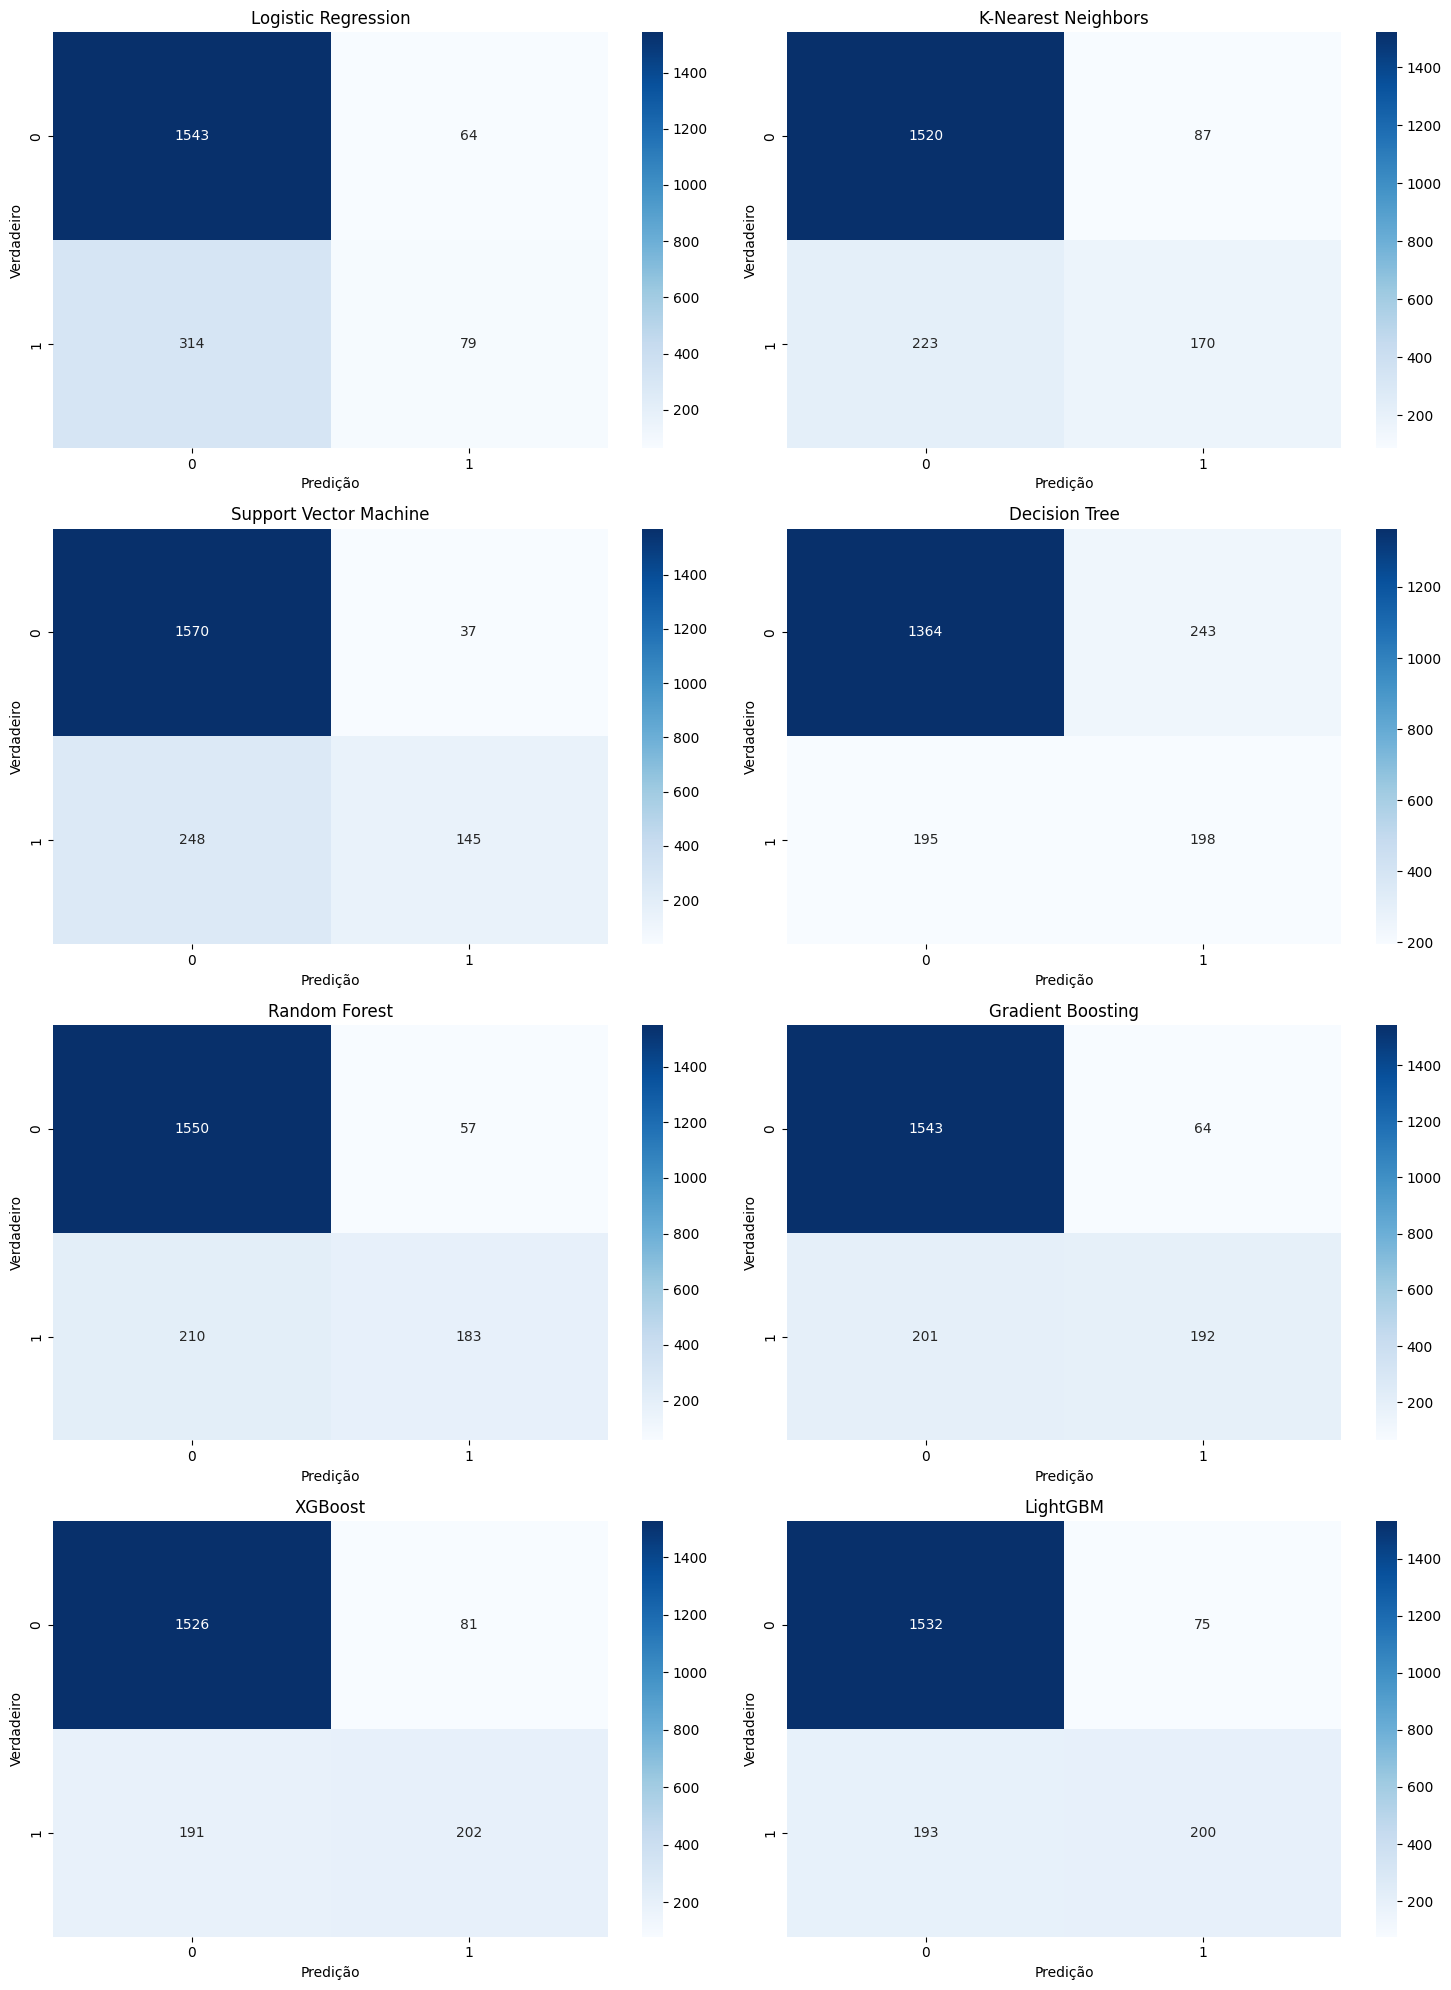

In [ ]:
# Definir modelos para testar
models = {
    'Logistic Regression': LogisticRegression(random_state=random_seed),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True, random_state=random_seed),
    'Decision Tree': DecisionTreeClassifier(random_state=random_seed),
    'Random Forest': RandomForestClassifier(random_state=random_seed),
    'Gradient Boosting': GradientBoostingClassifier(random_state=random_seed),
    'XGBoost': XGBClassifier(random_state=random_seed, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(random_state=random_seed)
}

# Avaliar modelos
results = {}
for name, model in models.items():
    # Criar pipeline com pré-processamento e modelo
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Treinar o modelo
    pipeline.fit(X_train, y_train)

    # Fazer previsões
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1]

    # Calcular métricas
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_test, y_prob)

    results[name] = {
        'confusion_matrix': cm,
        'classification_report': report,
        'roc_auc': roc_auc
    }

# Comparar resultados
for name, result in results.items():
    print(f"Modelo: {name}")
    print("Matriz de Confusão:")
    print(result['confusion_matrix'])
    print("Relatório de Classificação:")
    print(result['classification_report'])
    print("ROC AUC Score:", result['roc_auc'])
    print("\n")

# Plotar as matrizes de confusão para comparação visual
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.ravel()

for idx, (name, result) in enumerate(results.items()):
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(name)
    axes[idx].set_xlabel('Predição')
    axes[idx].set_ylabel('Verdadeiro')

plt.tight_layout()
plt.show()